In [1]:
import re
import random
import os
import glob
import json

In [2]:
import keras
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
from IPython.display import Image

Using TensorFlow backend.


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, Callback
import numpy as np
from keras.utils.np_utils import to_categorical
from keras.layers import Convolution2D, MaxPooling2D, GRU, TimeDistributed, Conv2D
from keras.layers.recurrent import SimpleRNN
from keras.layers import Dense, Dropout, Activation, Flatten, RepeatVector, Bidirectional
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.models import load_model
from keras.optimizers import SGD, Adam
from keras import backend as K
K.set_image_dim_ordering("th")
from seq2seq.models import AttentionSeq2Seq, Seq2Seq

In [4]:
image_shape = (3, 60, 250)
max_caption_len = 8
vocab_size = 37

In [5]:
image_model = Sequential()
image_model.add(Convolution2D(32, 3, 3, border_mode='valid', input_shape=image_shape))
image_model.add(BatchNormalization())
image_model.add(Activation('relu'))
image_model.add(Convolution2D(32, 3, 3))
image_model.add(BatchNormalization())
image_model.add(Activation('relu'))
image_model.add(MaxPooling2D(pool_size=(2, 2)))
image_model.add(Dropout(0.25))
image_model.add(Convolution2D(64, 3, 3, border_mode='valid'))
image_model.add(BatchNormalization())
image_model.add(Activation('relu'))
image_model.add(Convolution2D(64, 3, 3))
image_model.add(BatchNormalization())
image_model.add(Activation('relu'))
image_model.add(MaxPooling2D(pool_size=(2, 2)))
image_model.add(Dropout(0.25))
image_model.add(Flatten())
# Note: Keras does automatic shape inference.
image_model.add(Dense(128))
image_model.add(RepeatVector(1))
model = Seq2Seq(input_dim=128, input_length=1, hidden_dim=128, output_length=max_caption_len,
                             output_dim=128, peek=True)
image_model.add(model)
image_model.add(TimeDistributed(Dense(vocab_size)))
image_model.add(Activation('softmax'))
adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
image_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

/home/User/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(3, 60, 25..., padding="valid")`
  from ipykernel import kernelapp as app
/home/User/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
/home/User/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="valid")`
/home/User/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


In [7]:
    image_model2 = Sequential()
    image_model2.add(Convolution2D(32, 3, 3, border_mode='valid', input_shape=image_shape))
    image_model2.add(BatchNormalization())
    image_model2.add(Activation('relu'))
    image_model2.add(Convolution2D(32, 3, 3))
    image_model2.add(BatchNormalization())
    image_model2.add(Activation('relu'))
    image_model2.add(MaxPooling2D(pool_size=(2, 2)))
    image_model2.add(Dropout(0.25))
    image_model2.add(Convolution2D(64, 3, 3, border_mode='valid'))
    image_model2.add(BatchNormalization())
    image_model2.add(Activation('relu'))
    image_model2.add(Convolution2D(64, 3, 3))
    image_model2.add(BatchNormalization())
    image_model2.add(Activation('relu'))
    image_model2.add(MaxPooling2D(pool_size=(2, 2)))
    image_model2.add(Dropout(0.25))
    image_model2.add(Flatten())
    image_model2.add(Dense(128))
    image_model2.add(RepeatVector(max_caption_len))
    image_model2.add(Bidirectional(GRU(output_dim=128, return_sequences=True)))
    image_model2.add(TimeDistributed(Dense(vocab_size)))
    image_model2.add(Activation('softmax'))
    sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
    image_model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

/home/User/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(3, 60, 25..., padding="valid")`
  from ipykernel import kernelapp as app
/home/User/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
/home/User/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="valid")`
/home/User/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
/home/User/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:21: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(return_sequences=True, units=128)`

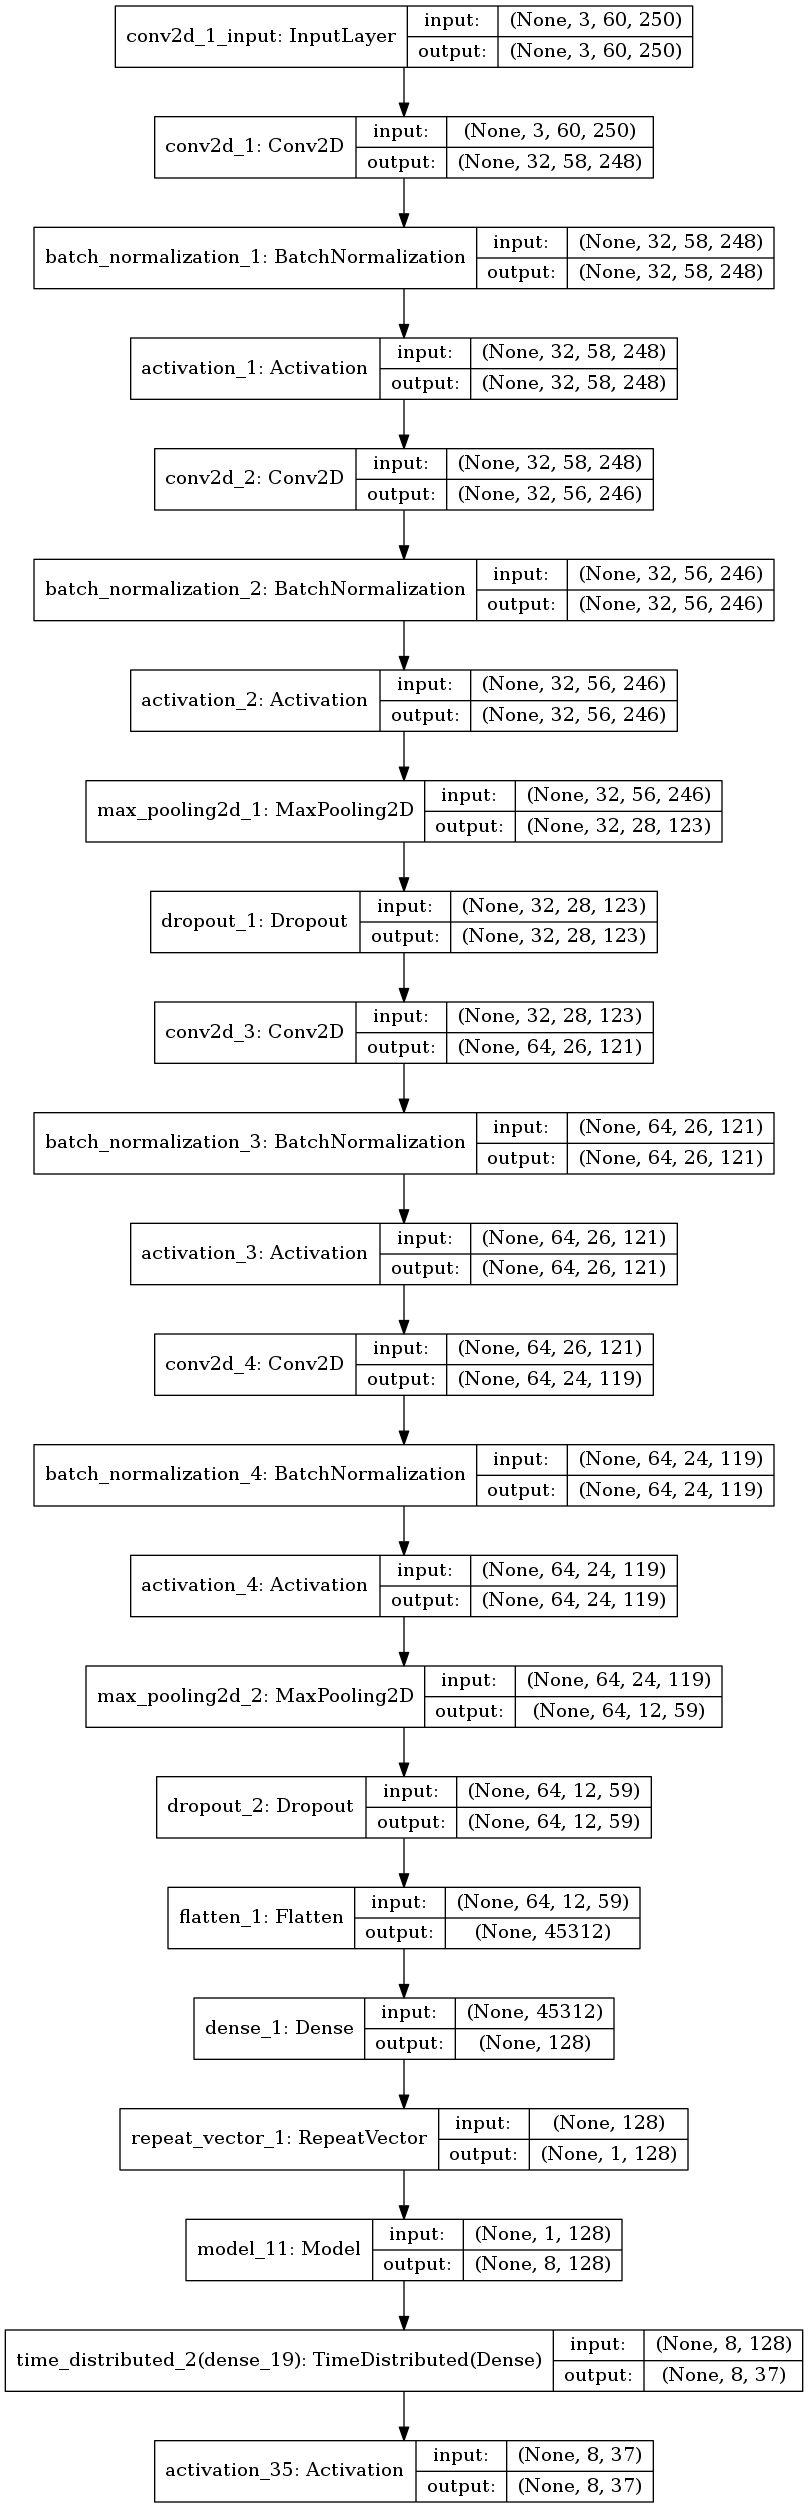

In [6]:
plot_model(image_model, to_file="model.png", show_shapes=True)
Image('model2.png')

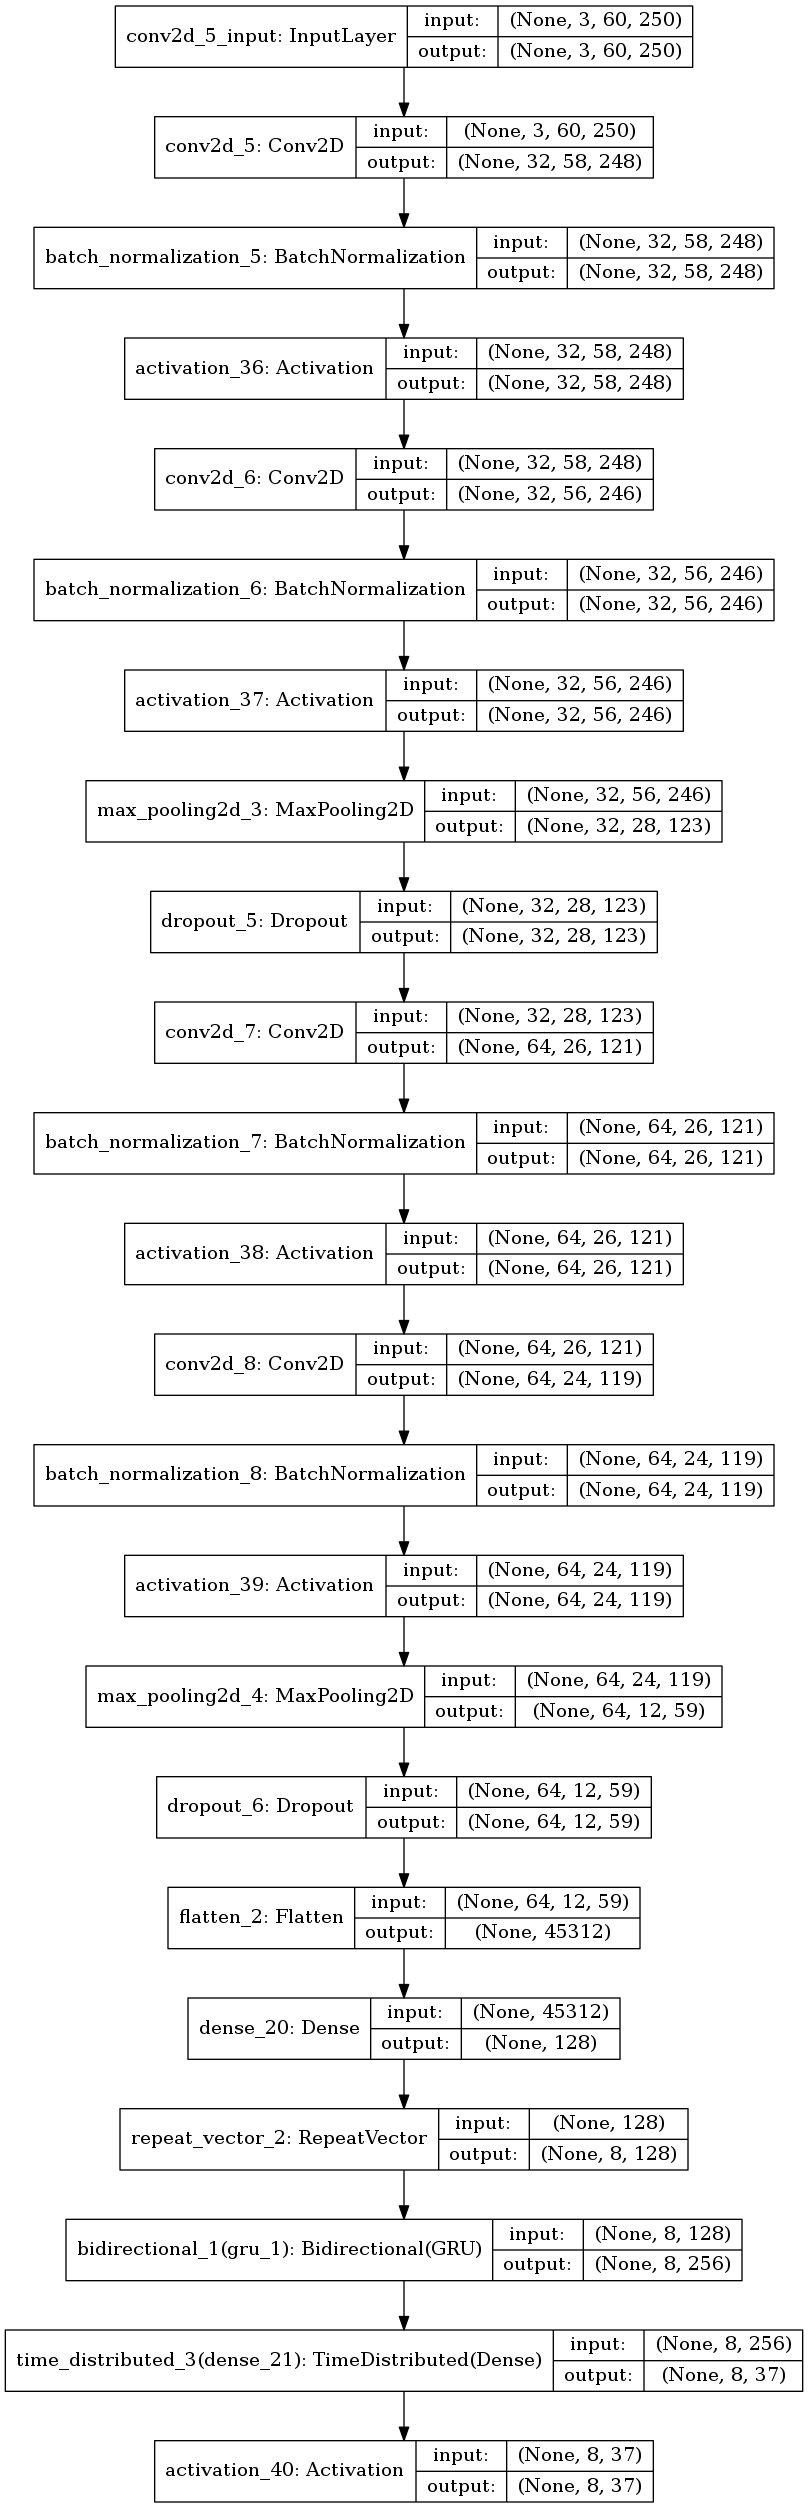

In [8]:
plot_model(image_model2, to_file="model2.png", show_shapes=True)
Image('model2.png')